In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df= pd.read_csv('googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
len(df)

10841

In [6]:
df['Reviews']= pd.to_numeric(df['Reviews'],errors='coerce')

In [7]:
df


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [8]:
def fix_size(x):
    if x[-1]=='M':
        return float(x[:-1])   
    elif  x[-1]=='K':
        return float(x[:-1]/1024)
    elif x[-1] =='+':
        return float(1)
    else :
        return np.nan
     

In [9]:
df['Size'] = df['Size'].apply(fix_size)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            8830 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [11]:
df['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Price, Length: 10841, dtype: object

In [12]:
def fix_price(x):
    try:
        if x.startswith('$'):
            return float(x[1:])
        
        else : 
            return 0.0
    except : 
        return np.nan

In [13]:
df['Price'] = df['Price'].apply(fix_price)

In [14]:
fix_price('Everyone')

0.0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            8830 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


In [16]:
df[df['Rating']>5].index

Int64Index([10472], dtype='int64')

In [17]:
df.drop(index = 10472,inplace=True)

In [18]:
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [19]:
df['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [20]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
df.drop(['Genres','Last Updated','Current Ver'],axis=1,inplace=True)

In [22]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,4.4 and up
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100+,Free,0.0,Everyone,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,Varies with device


In [23]:
def ver_4(x):
    try : 
        if x.startswith('4'):
            return 'Yes'
        else : return 'No'
    except : 
        return np.nan


In [24]:
ver_4('4.1 and up')

'Yes'

In [25]:
df['version 4'] = df['Android Ver'].apply(ver_4)

In [26]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,version 4
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,4.0.3 and up,Yes
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,4.0.3 and up,Yes
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,4.0.3 and up,Yes
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,4.2 and up,Yes
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,4.4 and up,Yes
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,4.1 and up,Yes
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100+,Free,0.0,Everyone,4.1 and up,Yes
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,2.2 and up,No
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,Varies with device,No


In [27]:
df.isna().sum() / len(df) * 100

App                0.000000
Category           0.000000
Rating            13.597786
Reviews            0.000000
Size              18.551661
Installs           0.000000
Type               0.009225
Price              0.000000
Content Rating     0.000000
Android Ver        0.018450
version 4          0.018450
dtype: float64

In [28]:
df.dropna()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,version 4
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,4.0.3 and up,Yes
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,4.0.3 and up,Yes
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,4.0.3 and up,Yes
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,4.2 and up,Yes
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,4.4 and up,Yes
...,...,...,...,...,...,...,...,...,...,...,...
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881.0,2.3,"100,000+",Free,0.0,Everyone,1.6 and up,No
10834,FR Calculator,FAMILY,4.0,7.0,2.6,500+,Free,0.0,Everyone,4.1 and up,Yes
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,4.1 and up,Yes
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100+,Free,0.0,Everyone,4.1 and up,Yes


In [29]:
df[df['Price']==df['Price'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,version 4
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,"10,000+",Paid,400.0,Everyone,4.1 and up,Yes


In [30]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [31]:
df.groupby('Type')['Size'].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,8175.0,22.345761,22.648567,1.0,5.500,14.0,30.0,100.0
Paid,654.0,21.330275,22.374559,1.0,4.325,13.0,32.0,100.0


In [32]:
df[df['Rating']==5].sort_values('Price',ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,version 4
5489,AP Art History Flashcards,FAMILY,5.0,1.0,96.0,10+,Paid,29.99,Mature 17+,4.0 and up,Yes
7477,USMLE Step 2 CK Flashcards,FAMILY,5.0,1.0,40.0,10+,Paid,19.99,Everyone,2.2 and up,No
5246,Hey AJ! It's Bedtime!,FAMILY,5.0,1.0,63.0,10+,Paid,4.99,Everyone,2.3 and up,No
7204,TI-84 CE Graphing Calculator Manual TI 84,FAMILY,5.0,1.0,27.0,100+,Paid,4.99,Everyone,4.1 and up,Yes
5482,meStudying: AP English Lit,FAMILY,5.0,1.0,NaN,10+,Paid,4.99,Everyone,2.0.1 and up,No


In [33]:
len(df[df['Reviews']>50000])

2782

In [34]:
df.groupby(['Category','Installs'])['Price'].mean()

Category        Installs   
ART_AND_DESIGN  0+             0.000000
                1,000+         0.663333
                1,000,000+     0.000000
                10,000+        0.180909
                10,000,000+    0.000000
                                 ...   
WEATHER         5,000,000+     0.000000
                50,000+        0.000000
                50,000,000+    0.000000
                500+           1.660000
                500,000+       0.855714
Name: Price, Length: 515, dtype: float64

In [35]:
len(df[df['Rating']>4.7])

595

In [36]:
df[df['Rating']>4.7].describe()

,Rating,Reviews,Size,Price
count,595.000000,5.950000e+02,558.000000,595.000000
mean,4.906723,4.353970e+04,17.652867,0.501849
std,0.092233,2.590468e+05,19.903999,2.252596
min,4.800000,1.000000e+00,1.000000,0.000000
25%,4.800000,4.000000e+00,4.200000,0.000000
50%,4.900000,1.600000e+01,10.000000,0.000000
75%,5.000000,4.660000e+02,23.000000,0.000000
max,5.000000,4.559407e+06,96.000000,29.990000


In [37]:
df[df['Installs']=='5,000,000+']['Price'].sum()

0.0

In [38]:
df.groupby('Type')['Size'].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,8175.0,22.345761,22.648567,1.0,5.500,14.0,30.0,100.0
Paid,654.0,21.330275,22.374559,1.0,4.325,13.0,32.0,100.0


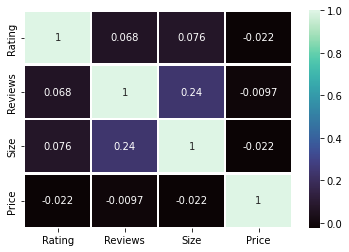

In [39]:
sns.heatmap(df.corr(),annot=True,linewidths=1.5,cmap='mako')

In [40]:
pd.pivot_table(values='Price',index='Category',columns='Installs',data=df)

Installs,0,0+,1+,"1,000+","1,000,000+","1,000,000,000+",10+,"10,000+","10,000,000+",100+,...,"100,000,000+",5+,"5,000+","5,000,000+",50+,"50,000+","50,000,000+",500+,"500,000+","500,000,000+"
Category,,,,,,,,,,,,,,,,,,,,,
ART_AND_DESIGN,NaN,0.000,NaN,0.663333,0.000000,NaN,NaN,0.180909,0.000000,0.000000,...,NaN,NaN,0.398000,0.0,NaN,0.000000,0.0,NaN,0.000000,NaN
AUTO_AND_VEHICLES,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.248333,...,NaN,0.000000,0.000000,0.0,9.990000,0.398000,NaN,0.000000,0.000000,NaN
BEAUTY,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,NaN
BOOKS_AND_REFERENCE,NaN,NaN,5.990000,0.149118,0.000000,0.0,3.996842,0.179600,0.000000,0.570000,...,0.0,1.852857,0.474375,0.0,0.583333,0.000000,NaN,0.220000,0.000000,NaN
BUSINESS,NaN,0.000,0.000000,0.183265,0.000000,NaN,2.201905,0.065000,0.000000,0.432763,...,0.0,0.055000,0.000000,0.0,0.359600,0.000000,0.0,0.782174,0.000000,NaN
COMICS,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.0,0.000000,0.000000,NaN,NaN,0.000000,NaN
COMMUNICATION,NaN,NaN,0.000000,0.294091,0.066444,0.0,1.392105,0.478400,0.000000,0.210606,...,0.0,0.000000,0.393158,0.0,0.000000,0.000000,0.0,0.906364,0.000000,0.0
DATING,NaN,NaN,0.000000,0.411176,0.000000,NaN,0.000000,0.295556,0.000000,0.787895,...,NaN,0.000000,0.000000,0.0,0.248333,0.000000,NaN,0.000000,0.000000,NaN
EDUCATION,NaN,NaN,NaN,4.990000,0.000000,NaN,NaN,0.000000,0.000000,NaN,...,0.0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.285000,NaN


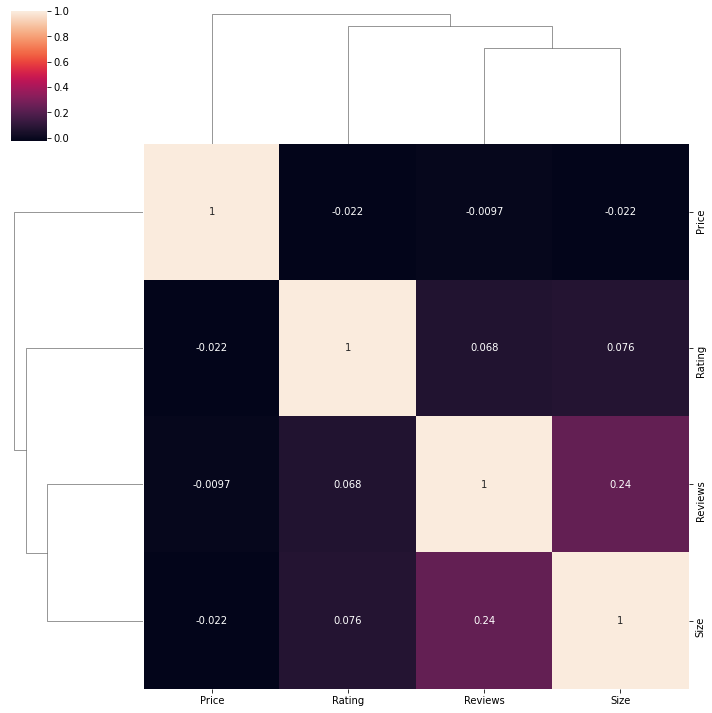

In [41]:
sns.clustermap(df.corr(),annot=True)